In [58]:
import pandas as pd
import numpy as numpy

df=pd.read_csv('../data/modelling_dataset.csv',index_col=0)

In [59]:
df.head()

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,var_6m_price_peak,var_6m_price_mid_peak,days_to_contract_end,days_from_last_modification,days_activ,days_renewal,average_yearly_price,total_cost,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,channel_1,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,9.953056e+01,4.423670e+01,138,89,958,220,0.099372,0.000000,0.020057,3.700961
1,channel_2,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,...,1.217891e-03,0.000000e+00,214,2352,2352,151,0.117546,547.764166,-0.003767,0.177779
2,channel_1,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,9.450150e-08,0.000000e+00,78,2114,2114,287,0.129466,70.429753,-0.004670,0.177779
3,channel_2,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,...,0.000000e+00,0.000000e+00,61,2131,2131,304,0.151210,239.516772,-0.004547,0.177779
4,channel_1,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,...,2.896760e-06,4.860000e-10,38,2207,2207,326,0.100226,443.499681,-0.006192,0.162916


### Predictive Model

We are dealing with a classification problem. The given churn data tells that the customers status in next 3 month. We need to be able to predict accurately churn status of customers so that we can take action before they leave our services.

In [60]:
# Our dataset contains categorical columns, channel_sales and origin_up

# Transform into categorical type
df['channel_sales'] = df['channel_sales'].astype('category')

# Let's see how many categories are within this column
df['channel_sales'].value_counts()

channel_sales
channel_1    9719
channel_2    2503
channel_3    1439
channel_4     929
channel_6      11
channel_5       3
channel_7       2
Name: count, dtype: int64

Last three channel is too low in value compared to size of dataset, thus will be dropped for the improvement of dimentionality

In [61]:
df = pd.get_dummies(df, columns=['channel_sales'])
df = df.drop(columns=['channel_sales_channel_5', 'channel_sales_channel_6', 'channel_sales_channel_7'])
df.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,days_activ,days_renewal,average_yearly_price,total_cost,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,channel_sales_channel_1,channel_sales_channel_2,channel_sales_channel_3,channel_sales_channel_4
0,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,...,958,220,0.099372,0.000000,0.020057,3.700961,True,False,False,False
1,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,...,2352,151,0.117546,547.764166,-0.003767,0.177779,False,True,False,False
2,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,...,2114,287,0.129466,70.429753,-0.004670,0.177779,True,False,False,False
3,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,...,2131,304,0.151210,239.516772,-0.004547,0.177779,False,True,False,False
4,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,...,2207,326,0.100226,443.499681,-0.006192,0.162916,True,False,False,False


In [62]:
# Our dataset contains categorical columns, channel_sales and origin_up

# Transform into categorical type
df['origin_up'] = df['origin_up'].astype('category')

# Let's see how many categories are within this column
df['origin_up'].value_counts()

origin_up
origin_1    7137
origin_2    4305
origin_3    3161
origin_4       2
origin_5       1
Name: count, dtype: int64

In [63]:
df = pd.get_dummies(df, columns=['origin_up'])
df = df.drop(columns=['origin_up_origin_4', 'origin_up_origin_5'])
df.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,total_cost,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,channel_sales_channel_1,channel_sales_channel_2,channel_sales_channel_3,channel_sales_channel_4,origin_up_origin_1,origin_up_origin_2,origin_up_origin_3
0,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,...,0.000000,0.020057,3.700961,True,False,False,False,True,False,False
1,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,...,547.764166,-0.003767,0.177779,False,True,False,False,False,True,False
2,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,...,70.429753,-0.004670,0.177779,True,False,False,False,False,True,False
3,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,...,239.516772,-0.004547,0.177779,False,True,False,False,False,True,False
4,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,...,443.499681,-0.006192,0.162916,True,False,False,False,False,True,False


In [73]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, roc_auc_score)
import seaborn as sns
import matplotlib.pyplot as plt

def classification_report_with_confusion_matrix(y_true, y_pred):    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Plot Confusion Matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()


### First Model: Random Forest Classifier

In [85]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X =df.drop(columns='churn',axis=1)
y=df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Add model training in here!
model = RandomForestClassifier(class_weight={0: 1, 1: 10},n_estimators=250,bootstrap=False) # Add parameters to the model!
model.fit(X_train,y_train)


RandomForestClassifier(bootstrap=False, class_weight={0: 1, 1: 10},
                       n_estimators=250)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      2894
           1       0.07      0.79      0.13        28

    accuracy                           0.90      2922
   macro avg       0.53      0.84      0.54      2922
weighted avg       0.99      0.90      0.94      2922


    Accuracy: 0.9011
    Precision: 0.7857
    Recall: 0.0721
    F1 Score: 0.1321
    ROC AUC: 0.5349
    


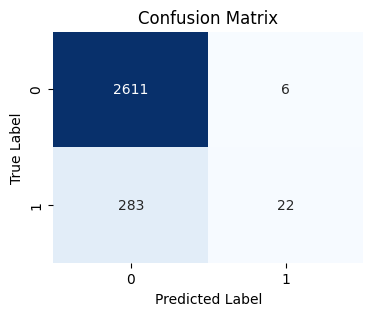

In [87]:
from sklearn.metrics import classification_report
y_pred=model.predict(X_test)
print(classification_report(y_pred,y_test))
classification_report_with_confusion_matrix(y_test,y_pred)


## Second Model: Neural Network for Binary Classification

For Gradient-Based Algorithms standartazing is important step

In [92]:
from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame called 'df' with the features you want to standardize
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your data and transform the data
X_scaled = scaler.fit_transform(X)

In [88]:
import tensorflow as tf
import os

# Setting GPU for computation power. Faster results.
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
#Check
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(50,)), 
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Calculate class weights to handle class imbalance
class_weights = compute_class_weight('balanced', classes=[0, 1], y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Fit the model with class weights
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.2, verbose=1, class_weight=class_weight_dict)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 128)               6528      
                                                                 
 dense_20 (Dense)            (None, 1)                 129       
                                                                 
Total params: 6,657
Trainable params: 6,657
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
293/293 [==============================] - 2s 5ms/step - loss: 0.6916 - accuracy: 0.5799 - val_loss: 0.6793 - val_accuracy: 0.5417
Epoch 2/100
293/293 [==============================] - 1s 3ms/step - loss: 0.6488 - accuracy: 0.6243 - val_loss: 0.6813 - val_accuracy: 0.5580
Epoch 3/100
293/293 [==============================] - 1s 3ms/step - loss: 0.6362 - accuracy: 0.6152 - val_loss: 0.6478 - val_accuracy: 0.6209
Epoch 4/100
293/293 [==============================] - 1s 3ms/step - loss: 0.6268 - accuracy: 0.6320 - val_loss: 0.6205 - val_accuracy: 0.6436
Epoch 5/100
293/293 [==============================] - 1s 4ms/step - loss: 0.6208 - accuracy: 0.6548 - val_loss: 0.6508 - val_accuracy: 0.6350
Epoch 6/100
293/293 [==============================] - 1s 3ms/step - loss: 0.6195 - accuracy: 0.6560 - val_loss: 0.6017 - val_accuracy: 0.7056
Epoch 7/100
293/293 [==============================] - 1s 3ms/step - loss: 0.6131 - accuracy: 0.6561 - val_loss: 0.7106 - val_accuracy: 0.5884

92/92 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      2425
           1       0.30      0.19      0.23       497

    accuracy                           0.79      2922
   macro avg       0.58      0.55      0.55      2922
weighted avg       0.75      0.79      0.77      2922


    Accuracy: 0.7892
    Precision: 0.1871
    Recall: 0.3049
    F1 Score: 0.2319
    ROC AUC: 0.5753
    


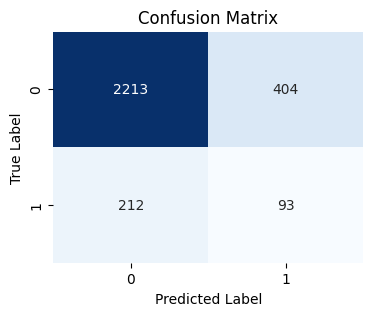

In [102]:
from sklearn.metrics import classification_report
y_pred=model.predict(X_test)
threshold = 0.5
y_pred_binary = (y_pred >= threshold).astype(int)
print(classification_report(y_pred_binary,y_test))
classification_report_with_confusion_matrix(y_test,y_pred_binary)


In [95]:
y_pred

array([[0.00250457],
       [0.09585498],
       [0.01695527],
       ...,
       [0.00542054],
       [0.01068593],
       [0.00045068]], dtype=float32)

In [96]:
y_test

4947     0
5868     0
6805     0
1323     0
11759    0
        ..
8846     0
4075     0
11619    0
2992     0
1369     0
Name: churn, Length: 2922, dtype: int64